In [2]:
from unsloth import FastLanguageModel 
import torch

In [3]:
max_seq_length = 2048
dtype = None
load_in_4bit = True



In [4]:
model, tokenizer = FastLanguageModel.from_pretrained("unsloth/Llama-3.2-1B", max_seq_length=max_seq_length, dtype=dtype, load_in_4bit=load_in_4bit)

c:\Users\y3kma\anaconda3\envs\llm_v2\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\y3kma\.cache\huggingface\hub\models--unsloth--llama-3.2-1b-bnb-4bit. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


==((====))==  Unsloth 2025.1.7: Fast Llama patching. Transformers: 4.48.1.
   \\   /|    GPU: NVIDIA GeForce MX550. Max memory: 2.0 GB. Platform: Windows.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


c:\Users\y3kma\anaconda3\envs\llm_v2\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\y3kma\.cache\huggingface\hub\models--unslothai--other. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\y3kma\anaconda3\envs\llm_v2\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingfa

In [6]:
model = FastLanguageModel.get_peft_model(
    model,
    r=16 ,
    target_modules= ["q_proj", "k_proj", "v_proj", "o_proj","gate_proj","up_proj","down_proj"],
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    use_gradient_checkpointing="unsloth",
    random_state=3407,
    use_rslora=False,
    loftq_config=None,
)

Unsloth 2025.1.7 patched 16 layers with 16 QKV layers, 16 O layers and 16 MLP layers.


In [7]:
from datasets import load_dataset

dataset = load_dataset("vicgalle/alpaca-gpt4",split="train")
print(dataset.column_names)

c:\Users\y3kma\anaconda3\envs\llm_v2\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\y3kma\.cache\huggingface\hub\datasets--vicgalle--alpaca-gpt4. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating train split: 100%|██████████| 52002/52002 [00:00<00:00, 533125.24 examples/s]

['instruction', 'input', 'output', 'text']


In [14]:
dataset

Dataset({
    features: ['instruction', 'input', 'output', 'text'],
    num_rows: 52002
})

In [15]:
from unsloth import to_sharegpt
dataset = to_sharegpt(dataset,merged_prompt="{instruction}[[\nYour input is:\n{input}]]",
                      output_column_name="output",conversation_extension=3)


Extending conversations: 100%|██████████| 52002/52002 [00:02<00:00, 20542.12 examples/s]


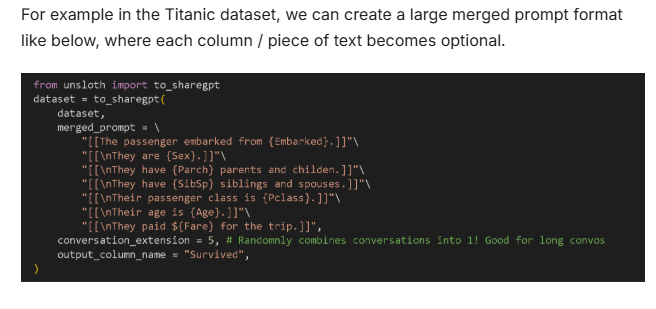

In [16]:
from unsloth import standardize_sharegpt
dataset = standardize_sharegpt(dataset)


Standardizing format: 100%|██████████| 52002/52002 [00:01<00:00, 29606.78 examples/s]


Dataset({
    features: ['conversations'],
    num_rows: 52002
})

In [17]:
dataset.data

MemoryMappedTable
conversations: list<item: struct<content: string, role: string>>
  child 0, item: struct<content: string, role: string>
      child 0, content: string
      child 1, role: string
----
conversations: [[    -- is_valid: all not null
    -- child 0 type: string
["Give three tips for staying healthy.","1. Eat a balanced and nutritious diet: Make sure your meals are inclusive of a variety of fruits and vegetables, lean protein, whole grains, and healthy fats. This helps to provide your body with the essential nutrients to function at its best and can help prevent chronic diseases.

2. Engage in regular physical activity: Exercise is crucial for maintaining strong bones, muscles, and cardiovascular health. Aim for at least 150 minutes of moderate aerobic exercise or 75 minutes of vigorous exercise each week.

3. Get enough sleep: Getting enough quality sleep is crucial for physical and mental well-being. It helps to regulate mood, improve cognitive function, and supports he

In [ ]:
https://docs.unsloth.ai/basics/tutorial-how-to-finetune-llama-3-and-use-in-ollama

In [ ]:
from unsloth import FastLanguageModel, is_bfloat16_supported
import torch
from unsloth.chat_templates import get_chat_template
from datasets import load_dataset
from trl import SFTTrainer
from transformers import Trainer, TrainingArguments


model, tokenizer = FastLanguageModel.from_pretrained(
model_name="mistralai/Mistral-7B-v0.1", 
max_seq_length=2048
)

model = FastLanguageModel.get_peft_model(model)

tokenizer = get_chat_template(
tokenizer, 
mapping = {"role" : "from", "content" : "value", "user" : "human", "assistant" : "gpt"}
)

origdataset = load_dataset("philschmid/guanaco-sharegpt-style", split="train")
conversations_dataset = origdataset.select_columns(['conversations'])

dataset = conversations_dataset.map(
lambda x: {
"text": tokenizer.apply_chat_template(
x["conversations"],
tokenize=False,
add_generation_prompt=False
)
},
batched=True,
batch_size=100,
desc="Formatting conversations"
)

trainer = SFTTrainer(
model = model,
tokenizer = tokenizer,
train_dataset = dataset,
dataset_text_field = "text",
dataset_num_proc = 2,
max_seq_length = 2048,
packing = False, # Can make training 5x faster for short sequences.
args = TrainingArguments(
per_device_train_batch_size = 2,
gradient_accumulation_steps = 4,
warmup_steps = 5,
max_steps = 60,
learning_rate = 2e-4,
fp16 = not is_bfloat16_supported(),
bf16 = is_bfloat16_supported(),
logging_steps = 1,
optim = "adamw_8bit",
weight_decay = 0.01,
lr_scheduler_type = "linear",
seed = 3407,
output_dir = "outputs",
report_to = "none", # Use this for WandB etc
),
)
trainer.train()

model.save_pretrained_gguf("ggufmodel", tokenizer, quantization_method = "q4_k_m")